In [45]:
from pathlib import Path

ROOT_DIR = Path('E:/MAJOR PROJECT/Dataset')
DATASET_DIR = Path('Dataset 0/road_classification')


DATASET_PATH = ROOT_DIR.joinpath(DATASET_DIR)

DATASET_PATH

WindowsPath('E:/MAJOR PROJECT/Dataset/Dataset 0/road_classification')

In [46]:
from utils.Files_Path import print_file_structure, list_files_in_folder

In [47]:
DATSET_FOLDER_LIST = print_file_structure(DATASET_PATH)

road_classification/
    Road Surface Image Dataset with Detailed Annotations/
        dataset(v2)/
            dataset/
                test-set/
                    1/
                        [60 files]
                    10/
                        [60 files]
                    11/
                        [60 files]
                    12/
                        [60 files]
                    2/
                        [60 files]
                    3/
                        [60 files]
                    4/
                        [60 files]
                    5/
                        [60 files]
                    6/
                        [60 files]
                    7/
                        [60 files]
                    8/
                        [60 files]
                    9/
                        [60 files]
                train-set/
                    dry_asphalt_severe/
                        [7930 files]
                    dry_asphalt_slight/
          

In [48]:
test_Data_Files = DATSET_FOLDER_LIST[0][5:17]
train_data_Files = DATSET_FOLDER_LIST[0][18:45]

test_Data_Files, train_data_Files

(['E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Image Dataset with Detailed Annotations\\dataset(v2)\\dataset\\test-set\\1',
  'E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Image Dataset with Detailed Annotations\\dataset(v2)\\dataset\\test-set\\10',
  'E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Image Dataset with Detailed Annotations\\dataset(v2)\\dataset\\test-set\\11',
  'E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Image Dataset with Detailed Annotations\\dataset(v2)\\dataset\\test-set\\12',
  'E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Image Dataset with Detailed Annotations\\dataset(v2)\\dataset\\test-set\\2',
  'E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Image Dataset with Detailed Annotations\\dataset(v2)\\dataset\\test-set\\3',
  'E:\\MAJOR PROJECT\\Dataset\\Dataset 0\\road_classification\\Road Surface Ima

In [49]:
import pandas as pd
from typing import List

def collect_image_and_text_data(directories: List[str]) -> pd.DataFrame:
    """
    Collects image file paths and corresponding text file content from the given list of directories.

    Parameters
    ----------
    directories : List[str]
        A list of directory paths where each directory contains image files and corresponding text files.

    Returns
    -------
    pd.DataFrame
        A DataFrame with two columns: 'image_path' and 'text_content'.
    """
    image_paths = []
    text_contents = []

    for dir_path in directories:
        directory = Path(dir_path)

        # Check if the directory exists
        if not directory.exists() or not directory.is_dir():
            continue

        # Collect image files and corresponding text files
        for item in directory.iterdir():
            if item.is_file():
                if item.suffix.lower() in ['.jpg', '.png', '.jpeg', '.bmp']:  # Image file extensions
                    # Corresponding text file path
                    text_file = directory / (item.stem + '.txt')
                    if text_file.exists():
                        with open(text_file, 'r', encoding='utf-8') as f:
                            text_content = f.read()
                    else:
                        text_content = ""
                    
                    image_paths.append(str(item))
                    text_contents.append(text_content)

    # Create DataFrame
    df = pd.DataFrame({
        'image_path': image_paths,
        'text_content': text_contents
    })

    return df

In [50]:
df = collect_image_and_text_data(test_Data_Files)
print(df)

                                            image_path  \
0    E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
1    E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
2    E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
3    E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
4    E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
..                                                 ...   
355  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
356  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
357  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
358  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   
359  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...   

                                          text_content  
0    dry-asphalt-smooth dry-asphalt-smooth dry-asph...  
1    dry-asphalt-smooth dry-asphalt-smooth dry-asph...  
2    dry-asphalt-smooth dry-asphalt-smooth dry-asph...  
3    dry-asphalt-smooth dry-asphalt-smooth dry-asph...  
4    dry-asphalt-s

In [51]:
len(df)

360

In [52]:
df.head()

,image_path,text_content
0,E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...,dry-asphalt-smooth dry-asphalt-smooth dry-asph...
1,E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...,dry-asphalt-smooth dry-asphalt-smooth dry-asph...
2,E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...,dry-asphalt-smooth dry-asphalt-smooth dry-asph...
3,E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...,dry-asphalt-smooth dry-asphalt-smooth dry-asph...
4,E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...,dry-asphalt-smooth dry-asphalt-smooth dry-asph...


In [53]:
# Combine all text content into a single string
all_text = ' '.join(df['text_content'])

# Split the text into words and find unique words
unique_words = set(all_text.split())

# Count unique words
num_unique_words = len(unique_words)

print(f"Number of unique words: {num_unique_words}")
for j,i in enumerate(unique_words):
    print(f'\t{j}>',i)

Number of unique words: 24
	0> water-concrete-severe
	1> wet-mud
	2> water-concrete-slight
	3> dry-gravel
	4> wet-gravel
	5> water-asphalt-smooth
	6> wet-concrete-smooth
	7> dry-asphalt-severe
	8> wet-asphalt-smooth
	9> water-asphalt-slight
	10> dry-asphalt-slight
	11> water-asphalt-severe
	12> dry-concrete-severe
	13> dry-concrete-slight
	14> wet-concrete-severe
	15> water-gravel
	16> water-mud
	17> wet-asphalt-severe
	18> wet-concrete-slight
	19> dry-mud
	20> dry-asphalt-smooth
	21> dry-concrete-smooth
	22> water-concrete-smooth
	23> wet-asphalt-slight


In [54]:
# Apply one-hot encoding to 'text_content'
df_encoded = df['text_content'].str.get_dummies(sep=' ')

# Concatenate the one-hot encoded columns with the original DataFrame
df_combined = pd.concat([df, df_encoded], axis=1)

# Drop the original 'text_content' column if it's no longer needed
df_combined = df_combined.drop(columns=['text_content'])

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define the specific vocabulary set
vocabulary = [
    'dry-asphalt-severe', 'dry-asphalt-slight', 'dry-asphalt-smooth', 
    'dry-concrete-severe', 'dry-concrete-slight', 'dry-concrete-smooth', 
    'dry-gravel', 'dry-mud', 'water-asphalt-severe', 'water-asphalt-slight', 
    'water-asphalt-smooth', 'water-concrete-severe', 'water-concrete-slight', 
    'water-concrete-smooth', 'water-gravel', 'water-mud', 'wet-asphalt-severe', 
    'wet-asphalt-slight', 'wet-asphalt-smooth', 'wet-concrete-severe', 
    'wet-concrete-slight', 'wet-concrete-smooth', 'wet-gravel', 'wet-mud'
]

# Initialize CountVectorizer with the provided vocabulary and a custom token pattern
vectorizer = CountVectorizer(vocabulary=vocabulary, token_pattern=r'\b[\w-]+\b')

# Fit and transform the text content to get phrase counts
X_counts = vectorizer.fit_transform(df['text_content'])

# Convert the resulting sparse matrix to a DataFrame
df_encoded_number = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

# Combine the DataFrame with the encoded counts, but exclude the 'text_content' column
df_combined_number = pd.concat([df.drop(columns=['text_content']), df_encoded_number], axis=1)

# Display the first few rows of the result
print(df_combined_number.head())


                                          image_path  dry-asphalt-severe  \
0  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...                   0   
1  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...                   0   
2  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...                   0   
3  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...                   0   
4  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...                   0   

   dry-asphalt-slight  dry-asphalt-smooth  dry-concrete-severe  \
0                   0                   8                    0   
1                   0                   8                    0   
2                   0                   8                    0   
3                   0                   8                    0   
4                   0                   8                    0   

   dry-concrete-slight  dry-concrete-smooth  dry-gravel  dry-mud  \
0                    0                    0           0        0   
1         

In [14]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   image_path             360 non-null    object
 1   dry-asphalt-severe     360 non-null    int64 
 2   dry-asphalt-slight     360 non-null    int64 
 3   dry-asphalt-smooth     360 non-null    int64 
 4   dry-concrete-severe    360 non-null    int64 
 5   dry-concrete-slight    360 non-null    int64 
 6   dry-concrete-smooth    360 non-null    int64 
 7   dry-gravel             360 non-null    int64 
 8   dry-mud                360 non-null    int64 
 9   water-asphalt-severe   360 non-null    int64 
 10  water-asphalt-slight   360 non-null    int64 
 11  water-asphalt-smooth   360 non-null    int64 
 12  water-concrete-severe  360 non-null    int64 
 13  water-concrete-slight  360 non-null    int64 
 14  water-concrete-smooth  360 non-null    int64 
 15  water-gravel           

In [15]:
from collections import defaultdict

# Initialize a dictionary to store counts
folder_file_counts = defaultdict(int)

# Count files in each folder
for folder_path in train_data_Files:
    files = list_files_in_folder(folder_path)
    folder_name = Path(folder_path).name
    folder_file_counts[folder_name] = len(files)

# Convert dictionary to DataFrame
df_file_counts = pd.DataFrame(list(folder_file_counts.items()), columns=['Folder', 'File Count'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27740\1101175333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=df_file_counts, x='Folder', y='File Count', palette='viridis')


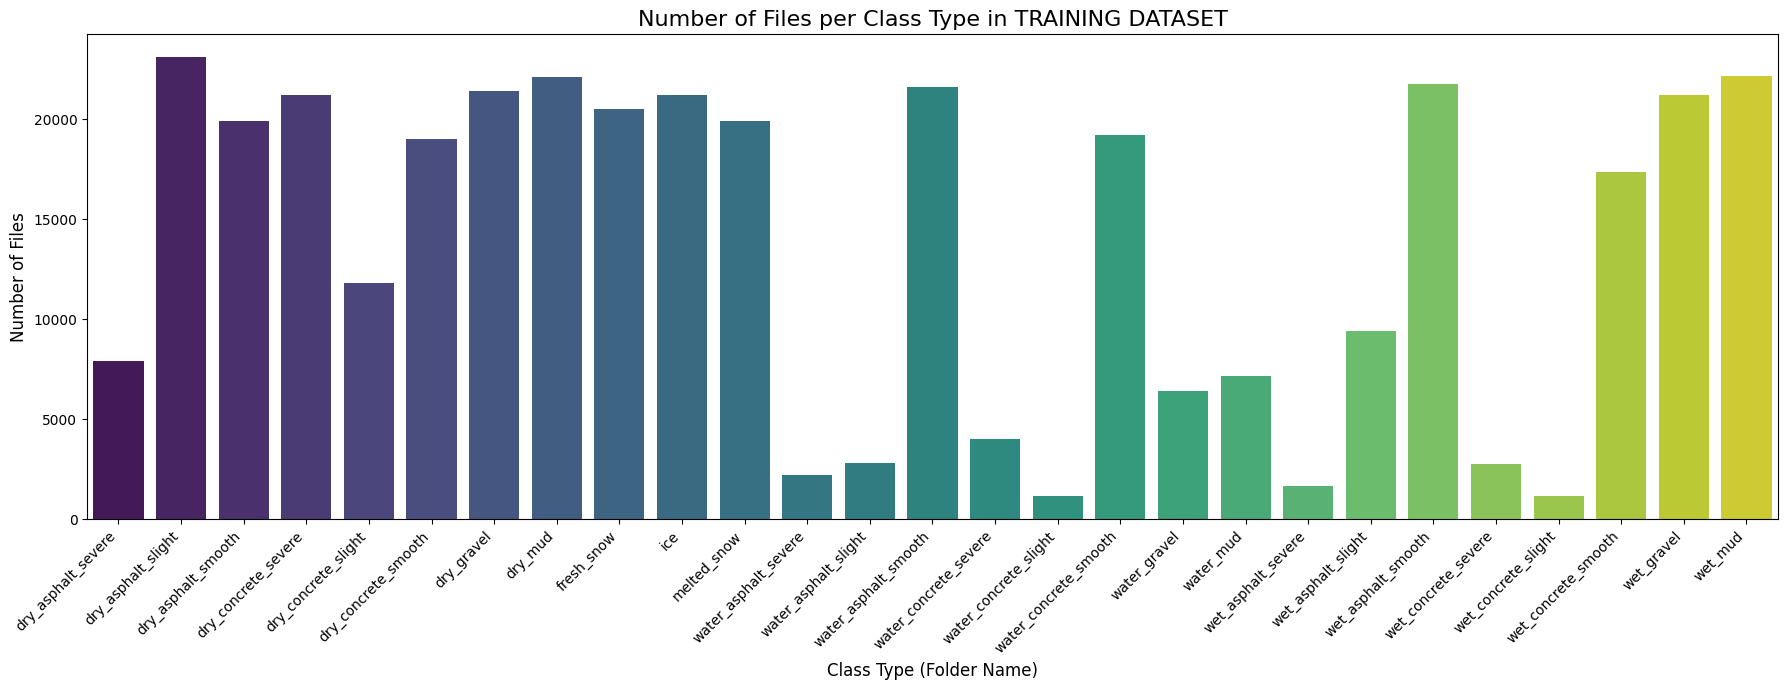

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(18, 7))
bar_plot = sns.barplot(data=df_file_counts, x='Folder', y='File Count', palette='viridis')

# Add titles and labels
bar_plot.set_title('Number of Files per Class Type in TRAINING DATASET', fontsize=16)
bar_plot.set_xlabel('Class Type (Folder Name)', fontsize=12)
bar_plot.set_ylabel('Number of Files', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
image_paths = []
class_types = []

# Extract image paths and their class types
for folder_path in train_data_Files:
    files = list_files_in_folder(folder_path)
    folder_name = Path(folder_path).name  # Assuming folder name is the class type
    
    for file in files:
        image_paths.append(file)
        class_types.append(folder_name)

# Create a DataFrame with image paths and class types
df_image_class = pd.DataFrame({
    'image_path': image_paths,
    'class_type': class_types
})

# Display the first few rows of the DataFrame
print(df_image_class.head())

                                          image_path          class_type
0  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...  dry_asphalt_severe
1  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...  dry_asphalt_severe
2  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...  dry_asphalt_severe
3  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...  dry_asphalt_severe
4  E:\MAJOR PROJECT\Dataset\Dataset 0\road_classi...  dry_asphalt_severe


In [26]:
'Number of Extracted Images: ',len(df_image_class)

('Number of Extracted Images: ', 370151)

In [27]:
'Actual Number of Images:',sum(folder_file_counts.values())

('Actual Number of Images:', 370151)

In [24]:
df_file_counts = pd.DataFrame.from_dict(folder_file_counts, orient='index', columns=['Count'])
df_file_counts.index.name = 'Class'

# Reset index to make 'Folder' a column instead of an index
df_file_counts.reset_index(inplace=True)

# Display the DataFrame
print(df_file_counts)
print(df_combined.head())
print(df_image_class.head())

                    Class  Count
0      dry_asphalt_severe   7930
1      dry_asphalt_slight  23090
2      dry_asphalt_smooth  19913
3     dry_concrete_severe  21194
4     dry_concrete_slight  11811
5     dry_concrete_smooth  19003
6              dry_gravel  21413
7                 dry_mud  22094
8              fresh_snow  20511
9                     ice  21203
10            melted_snow  19902
11   water_asphalt_severe   2204
12   water_asphalt_slight   2800
13   water_asphalt_smooth  21612
14  water_concrete_severe   4024
15  water_concrete_slight   1181
16  water_concrete_smooth  19226
17           water_gravel   6435
18              water_mud   7155
19     wet_asphalt_severe   1646
20     wet_asphalt_slight   9408
21     wet_asphalt_smooth  21746
22    wet_concrete_severe   2763
23    wet_concrete_slight   1163
24    wet_concrete_smooth  17376
25             wet_gravel  21208
26                wet_mud  22140
                                          image_path  dry-asphalt-severe  \


In [57]:
CSV_FILE_PATH = "Dataset\\Dataset0\\"

# df_file_counts.to_csv(CSV_FILE_PATH+'df_file_counts.csv', index=False)
# df_combined.to_csv(CSV_FILE_PATH+'df_test_data_onehotencoding.csv', index=False)
# df_image_class.to_csv(CSV_FILE_PATH+'df_image_class.csv', index=False)

In [58]:
# df_combined_number.to_csv(CSV_FILE_PATH+'df_test_data_number.csv', index=False)